## TechnoHacks Task: 2

### Movie Review Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Dataset: BagofWords_MeetsBagsofPopcorn.tsv <br>
Info: The data set consists of 50000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews.

In [2]:
df = pd.read_csv("Dataset/labeledTrainData.tsv", delimiter='\t')
df.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
df.isnull().sum()

id           0
sentiment    0
review       0
dtype: int64

In [4]:
df.sentiment.value_counts()

sentiment
1    12500
0    12500
Name: count, dtype: int64

In [5]:
df.drop(['id'], axis=1, inplace=True)

### Text Data Preprocessing

In [6]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk


def preprocess_text(text):
    
    # Remove HTML tags
    clean_text = re.sub(r'<[^>]+>', '', text)
    
    # Convert to lowercase
    clean_text = clean_text.lower()
    
    # Remove URLs
    clean_text = re.sub(r'http\S+', '', clean_text)
    
    # Remove mentions
    clean_text = re.sub(r'@(\w+)', '', clean_text)
    
    # Remove hashtags
    clean_text = re.sub(r'#(\w+)', '', clean_text)
    
    # Remove special characters and punctuation
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    
    # Remove numeric characters
    clean_text = re.sub(r'\d+', '', clean_text)
    
    # Remove extra whitespaces
    clean_text = ' '.join(clean_text.split())
    
    # Lemmatization
#     lemmatizer = WordNetLemmatizer()
#     clean_text = ' '.join([lemmatizer.lemmatize(word) for word in clean_text.split()])
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    clean_text = ' '.join([word for word in clean_text.split() if word not in stop_words])
    
    return clean_text

In [7]:
df['review_processed'] = df['review'].apply(preprocess_text)

In [8]:
df

,sentiment,review,review_processed
0,1,With all this stuff going down at the moment w...,stuff going moment mj ive started listening mu...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi...",classic war worlds timothy hines entertaining ...
2,0,The film starts with a manager (Nicholas Bell)...,film starts manager nicholas bell giving welco...
3,0,It must be assumed that those who praised this...,must assumed praised film greatest filmed oper...
4,1,Superbly trashy and wondrously unpretentious 8...,superbly trashy wondrously unpretentious explo...
...,...,...,...
24995,0,It seems like more consideration has gone into...,seems like consideration gone imdb reviews fil...
24996,0,I don't believe they made this film. Completel...,dont believe made film completely unnecessary ...
24997,0,"Guy is a loser. Can't get girls, needs to buil...",guy loser cant get girls needs build picked st...
24998,0,This 30 minute documentary Buñuel made in the ...,minute documentary buñuel made early one spain...


### Train and Test data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.review_processed, df.sentiment, test_size=0.2, random_state=42)

In [11]:
X_train.shape, X_test.shape

((20000,), (5000,))

### Vector Representation

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [13]:
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [14]:
import pickle
with open('count_vectorizer.pkl', 'wb') as f:
    pickle.dump(cv, f)

In [15]:
X_train_np = X_train_cv.toarray()
X_train_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [16]:
X_test_np = X_test_cv.toarray()
X_test_np

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
X_train_np[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
cv.vocabulary_

{'movie': 69377,
 'plain': 80382,
 'dumbfrom': 30695,
 'casting': 16100,
 'ralph': 85243,
 'meeker': 65879,
 'mike': 67036,
 'hammer': 46185,
 'fatuous': 36872,
 'climax': 19029,
 'film': 37753,
 'exercise': 35027,
 'wooden': 117937,
 'predictabilitymike': 82294,
 'one': 74886,
 'detective': 26741,
 'fictions': 37554,
 'true': 109722,
 'sociopaths': 97842,
 'unlike': 111853,
 'marlow': 64523,
 'spade': 98734,
 'put': 84380,
 'pieces': 79868,
 'together': 107853,
 'solve': 98068,
 'mystery': 70702,
 'breaks': 13006,
 'things': 106272,
 'apart': 4878,
 'get': 42625,
 'truth': 109809,
 'turns': 110103,
 'boob': 12022,
 'surrounding': 103169,
 'bad': 7590,
 'guys': 45559,
 'well': 116009,
 'dumb': 30672,
 'away': 7115,
 'anything': 4760,
 'poorly': 81414,
 'drawn': 30027,
 'succumbs': 102290,
 'popcorn': 81445,
 'attackother': 6484,
 'parts': 77887,
 'right': 88828,
 'three': 106781,
 'stooges': 100910,
 'play': 80520,
 'book': 12063,
 'veldas': 113313,
 'dance': 24506,
 'barre': 8393,
 'i

In [19]:
cv.get_feature_names_out().shape

(120281,)

In [20]:
cv.get_feature_names_out()[4065]

'angles'

In [21]:
X_train_np[:5][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
np.where(X_train_np[0] != 0)

(array([   566,   4065,   4760,   4878,   6466,   6484,   7115,   7440,
          7590,   8393,   9426,  11478,  12022,  12063,  12398,  12969,
         13006,  15010,  16100,  16629,  19029,  19111,  21552,  24506,
         26741,  30027,  30672,  30695,  34841,  35027,  36086,  36872,
         37554,  37753,  38273,  40407,  42625,  42640,  44365,  45535,
         45559,  45583,  46185,  48196,  50389,  53357,  53653,  60039,
         60847,  62496,  64523,  65879,  67036,  67498,  69377,  70542,
         70702,  74886,  77887,  77986,  79868,  80382,  80520,  81072,
         81414,  81445,  82217,  82294,  84096,  84380,  85243,  86080,
         88828,  89157,  90293,  92886,  93096,  94200,  94550,  94936,
         95341,  95538,  95799,  97842,  98068,  98734,  99782,  99913,
        100910, 102290, 103169, 106272, 106781, 107161, 107853, 109722,
        109809, 110103, 110386, 111853, 113313, 115567, 116009, 117015,
        117937, 118398], dtype=int64),)

In [23]:
X_train[0:5][23311]

'movie plain dumbfrom casting ralph meeker mike hammer fatuous climax film exercise wooden predictabilitymike hammer one detective fictions true sociopaths unlike marlow spade put pieces together solve mystery hammer breaks things apart get truth film turns hammer boob surrounding bad guys well dumb get away anything one poorly drawn succumbs popcorn attackother parts movie right three stooges play book veldas dance barre instance bad guy accidentally stabs boss back continuity breaks shameful frau blucher running centerline road camera tight lower legs shes way side camera pulls back wider shot worst break however precedes popcorn attack bad guy stalking hammer passes clock seconds hero except clock shows seven minutes behind guyto fair interesting camera angles lighting grand finale bad must seen reason gets two points'

### Model Building

In [24]:
from sklearn.naive_bayes import MultinomialNB

In [25]:
model = MultinomialNB()

### Training

In [26]:
model.fit(X_train_cv, y_train)

MultinomialNB()

In [27]:
y_pred = model.predict(X_test_cv)
y_pred[:5]

array([0, 1, 0, 1, 0], dtype=int64)

In [28]:
y_test[:5]

6868     0
24016    1
9668     0
13640    1
14018    0
Name: sentiment, dtype: int64

### Evaluating

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

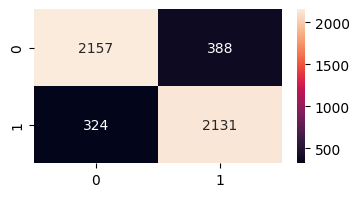

In [30]:
plt.figure(figsize=(4,2))
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt='d')
plt.show()

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      2481
           1       0.87      0.85      0.86      2519

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



In [32]:
X_train.shape, y_train.shape

((20000,), (20000,))

In [33]:
X_train_cv.shape, X_train_cv.ndim

((20000, 120281), 2)

In [34]:
X_train_np.shape, X_train_np.ndim

((20000, 120281), 2)

In [35]:
X_train.shape[0]

20000

In [36]:
type(X_train_cv), type(X_train_np), type(X_train)

(scipy.sparse._csr.csr_matrix, numpy.ndarray, pandas.core.series.Series)

### Neural Network Model

In [37]:
from tensorflow import keras

In [38]:
ANN = keras.Sequential([
    keras.layers.Dense(units=64, input_shape=(X_train_cv.shape[1],), activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=1, activation='sigmoid')
])

In [39]:
ANN.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

### Training

In [40]:
# Train the Model
history = ANN.fit(
    x = X_train_np,
    y = y_train,
    epochs = 5,
    batch_size = 64,
    validation_data=(X_test_np, y_test)
)

Epoch 1/5
313/313 [==============================] - 62s 196ms/step - loss: 0.3750 - accuracy: 0.8467 - val_loss: 0.2799 - val_accuracy: 0.8896
Epoch 2/5
313/313 [==============================] - 59s 187ms/step - loss: 0.1614 - accuracy: 0.9408 - val_loss: 0.3056 - val_accuracy: 0.8848
Epoch 3/5
313/313 [==============================] - 59s 188ms/step - loss: 0.0738 - accuracy: 0.9753 - val_loss: 0.3835 - val_accuracy: 0.8820
Epoch 4/5
313/313 [==============================] - 60s 193ms/step - loss: 0.0350 - accuracy: 0.9886 - val_loss: 0.4579 - val_accuracy: 0.8792
Epoch 5/5
313/313 [==============================] - 57s 183ms/step - loss: 0.0197 - accuracy: 0.9947 - val_loss: 0.5509 - val_accuracy: 0.8750


### Evaluating

In [41]:
ANN.evaluate(X_test_np, y_test)


157/157 [==============================] - 3s 20ms/step - loss: 0.5509 - accuracy: 0.8750


[0.5508513450622559, 0.875]

In [42]:
from sklearn.metrics import confusion_matrix

# Assuming you have predictions and true labels
predictions = ANN.predict(X_test_np)
predicted_labels = [1 if prediction > 0.5 else 0 for prediction in predictions]

# Create the confusion matrix
cm = confusion_matrix(y_test, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


157/157 [==============================] - 4s 21ms/step
Confusion Matrix:
[[2156  325]
 [ 300 2219]]


In [43]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2481
           1       0.87      0.88      0.88      2519

    accuracy                           0.88      5000
   macro avg       0.88      0.87      0.87      5000
weighted avg       0.88      0.88      0.87      5000



### Saving Model

In [44]:
# Save the model
ANN.save("modelANN2.h5")


### Model Testing with unseen data

In [45]:
reviews = ["the moview in not bad",
           "the movie is so wonderful yhan i expected",
           "This film is a visual concert. The animation and character design neatly put me to tears. The opening of the film took an approach that shocked me, but it was fantastic to watch. Many of the jokes were in the trailers, but plenty caught me off guard in the cinema. Miguel even had a couple of funny moments. The presence of existing spider characters, such as snippets of the other films, did feel somewhat strange I have to admit. However, it is made up for in how incredible this film was. It was artistic, mature, adult, and profound. It leaves the viewer on a cliffhanger that shocked me. I thought I was an hour into the film, but it was the end. I implore everyone wondering if they should see this film to do so. Easily the best film I have seen in a long time and the best film to see in theaters. A true masterpiece.",
           "When fx subsumes the storyline the movie always loses. In this case the street art style does the same thing as the weak plot drowns completely in artsy fartsy.A good movie is about the story it tells, not about superficial appearance. Thats really the hidden moral of the story.The plot rests on the current fashion for multiverse themes. It's like a huge tasteless meal that becomes impossible to digest The multiverse themes, the street art and the emo hooded young teenagers are designed to appeal to generation X. The dialogue is so badly mumbled it urgently needed to be subtitled.Highly confused jumbled dialogue mixed with a very infantile understanding of maths."]

In [46]:
review = cv.transform(reviews)

In [50]:
print("Sentiment of the review: 1 for positive reviews and 0 for negative reviews")


Sentiment of the review: 1 for positive reviews and 0 for negative reviews


In [57]:
predictions = ANN.predict(review)

# Interpret the predictions
for prediction in predictions:
    if prediction > 0.5:
        print("Positive")
    else:
        print("Negative")

1/1 [==============================] - 0s 19ms/step
Negative
Positive
Positive
Negative


### Predictions from Saved Model

In [51]:
loaded_model = keras.models.load_model("modelANN2.h5")
loaded_model

In [58]:
predictions = loaded_model.predict(review)

# Interpret the predictions
for prediction in predictions:
    if prediction > 0.5:
        print("Positive")
    else:
        print("Negative")

1/1 [==============================] - 0s 18ms/step
Negative
Positive
Positive
Negative


### Thank You!